In [2]:
import numpy as np
from matplotlib import pyplot as plt

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

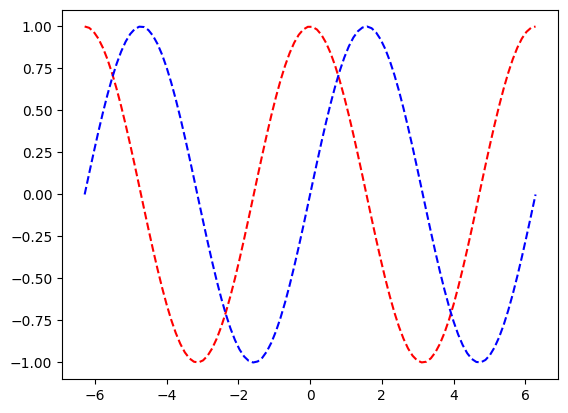

In [58]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y1 = np.cos(x)
y2 = np.sin(x)

#y = cos(x)
plt.plot(x, y1, 'r--')

#y = sin(x)
plt.plot(x, y2, 'b--')

plt.fill_between(x, y1, y2, where=(y1>y2 and y1>0.7), fc='green')

plt.grid()

In [39]:
# Fixing random state for reproducibility
np.random.seed(1)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

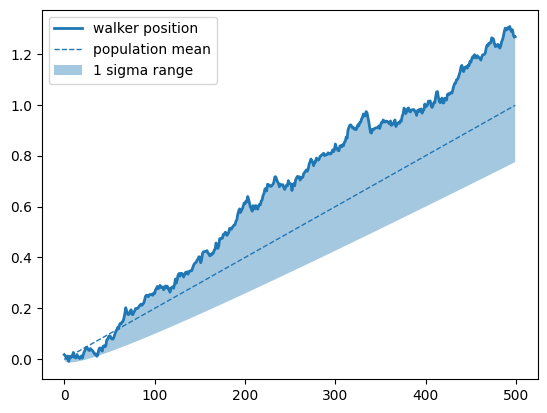

In [41]:
fig, ax = plt.subplots(1)
ax.plot(t, X, lw=2, label='walker position')
ax.plot(t, mu*t, lw=1, label='population mean', color='C0', ls='--')
ax.fill_between(t, lower_bound, X, facecolor='C0', alpha=0.4,
                label='1 sigma range')
ax.legend(loc='upper left')